# Sentimental Analysis

In [1]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('Whatsapp_Chat_Table.csv')
df['message'] = df['message'].apply(lambda x: str(x))

#Creating a function to get the subjectivity
def getSubjectivity(t):
  return TextBlob(t).sentiment.subjectivity

#Creating a function to get the polarity
def getPolarity(t):
  return TextBlob(t).sentiment.polarity

#Creating new coloumns
df['Subjectivity'] = df['message'].apply(getSubjectivity)
df['Polarity'] = df['message'].apply(getPolarity)



In [3]:
df.sample(100)

,Unnamed: 0,date_time,user,message,Subjectivity,Polarity
5672,5672,2020-05-02 21:34:00,"Tanay Kamath (TSEC, CS)",Wow,1.0,0.1
12066,12066,2020-09-13 17:09:00,"Tanay Kamath (TSEC, CS)","I don't understand python,thank you😐🙃",0.0,0.0
11407,11407,2020-09-11 11:27:00,"Dheeraj Lalwani (TSEC, CS)",And the rest is history,0.0,0.0
8902,8902,2020-07-14 21:59:00,"Darshan Rander (TSEC, IT)",😂😂,0.0,0.0
8006,8006,2020-06-26 10:45:00,"Darshan Rander (TSEC, IT)",😂😂😂,0.0,0.0
...,...,...,...,...,...,...
7524,7524,2020-06-13 00:12:00,"Dheeraj Lalwani (TSEC, CS)",Yeann,0.0,0.0
10950,10950,2020-08-27 22:16:00,"Darshan Rander (TSEC, IT)",Chilla ke sabko bata de😂🤦‍♂️,0.0,0.0
10770,10770,2020-08-26 13:32:00,+91 88284 70904,This message was deleted,0.0,0.0
5690,5690,2020-05-03 08:28:00,+91 88284 70904,Happy birthday @919820696178 🥳💪🏻,1.0,0.8


In [4]:
#Check positive,negetive or neutral chats
def getAnalysis(score):
  if(score < 0):
    return 'Negetive'
  elif(score == 0):
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df.sample(100)

,Unnamed: 0,date_time,user,message,Subjectivity,Polarity,Analysis
505,505,2020-02-01 12:46:00,"Tanay Kamath (TSEC, CS)",Similarly 5C2 is 10,0.400000,0.000000,Neutral
11059,11059,2020-09-02 18:05:00,"Dheeraj Lalwani (TSEC, CS)",And I feel like I'm enjoying the need of being...,0.600000,0.500000,Positive
396,396,2020-01-29 22:50:00,"Saket (TSEC, CS)",itself,0.000000,0.000000,Neutral
9870,9870,2020-08-13 14:37:00,"Darshan Rander (TSEC, IT)",But sometimes you can skip bicycle😁,0.000000,0.000000,Neutral
6701,6701,2020-05-28 02:40:00,"Harsh Kapadia (TSEC IT, SE)",True true,0.650000,0.350000,Positive
...,...,...,...,...,...,...,...
2175,2175,2020-02-25 21:39:00,"Dheeraj Lalwani (TSEC, CS)",Hey Folks !! We at GDG Cloud Mumbai have sta...,0.358333,0.221591,Positive
12397,12397,2020-09-17 21:16:00,+91 82916 21138,Oh shit,0.800000,-0.200000,Negetive
4686,4686,2020-04-12 17:28:00,+91 88305 26885,i knew but specifically it was about connected...,0.000000,0.000000,Neutral
2364,2364,2020-02-28 08:44:00,"Tanay Kamath (TSEC, CS)",https://code.dcoder.tech/files/code/5e520a8897...,0.000000,0.000000,Neutral


In [5]:
#Print all positive chats
sortedDF = df.sort_values(by = ['Polarity'])
j=1
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(f'{j}) ',sortedDF['message'][i])
    j+=1
    if(j > 100):
      break

1)  Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more. 
2)  Sure 
3)  More of logic or algo problems^ 
4)  Nice idea 🤟 
5)  Also  Please note  People genuinely interested in coding or Want to start coding only be in this group 
6)  Are you really thinking of just  printing the pattern😂 
7)  Cool 
8)  Alright  Actually, I was being lazy  Thoda syntax strong nahi hai😅😂 
9)  Thanks bhai 
10)  int main() {   int n;   cin>>n;   for (int i=1;i<=n;i++){       for(int j=1;j<=n+1-i;j++){           cout<<"*";       }       for (int k=1;k<=2*i-2;k++){           cout<<" ";       }       for(int j=1;j<=n+1-i;j++){           cout<<"*";       }cout<<endl;   }   for(int i=1;i<=n;i++){       for(int j=1;j<=i;j++){           cout<<"*";       }       for(int k=1;k<=2*(n-i);k++){           cout<<" ";           }           for (int j=1;j<=i;j++){               cout<<"*";           }cout<<endl;   } 
11)  Great !! Good u

In [14]:
#Print all Negetive chats
sortedDF = df.sort_values(by = ['Polarity'],ascending = False)
j=1
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negetive'):
    print(f'{j}) ',sortedDF['message'][i])
    j+=1
    if(j > 100):
      break

1)  Everyday a new challenge 
2)  Something or the other  So that we can build our problem solving skills 
3)  Dheeraj Lalwani (TSEC, CS) changed the subject from "CODERS👨‍💻👩‍💻🖥💻" to "TSEC CODERS👨‍💻👩‍💻🖥💻" 
4)  What would be the solution if the language is C ??  I mean we are learning so let's try going for it 
5)  I got a bit confused... 
6)  Created Another soln bcoz my previous wasn giving problems(not printing spaces) 
7)  This'll also do for that hollow diamond prog in c 
8)  Bcoz its a wrong program 
9)  Comma operator a small and imp note 
10)  Haan sorry 
11)  I will dry run it later 
12)  infact mere hisaab se undeclared indentifier ka error bhi pop up hona chaiye tha but run horaha hai🤯🤯 
13)  If you put the double in a variable and then store it in other variable after typescasting then it works! Like, x=pow(...); y=(int)x; 
14)  darshan sir told us to avoid statements like break if possible since it causes halt in the flow of the program abruptly and causes voltage fluctuati

In [26]:
df2 = df.sample(500)

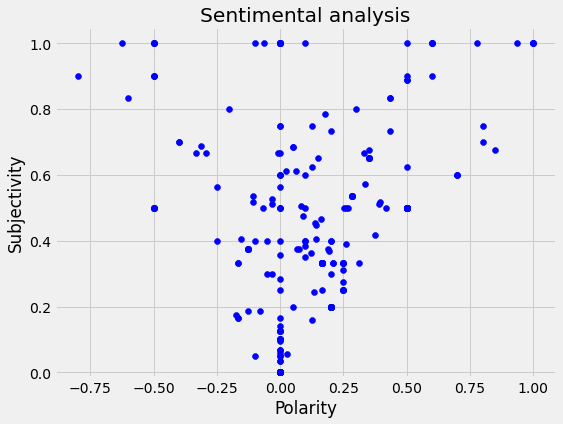

In [27]:
df2 = df.head(1000)
import matplotlib.pyplot as plt
plt.figure(figsize =  (8,6))
for i in range(0,df2.shape[0]):
  plt.scatter(df2['Polarity'][i],df2['Subjectivity'][i],color = "Blue")

plt.title('Sentimental analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [28]:
#Counting the sum of polarities
sum = 0
for i in range(0,df.shape[0]):
    sum += df['Polarity'][i]

  

In [29]:
if(sum > 0):
  print("The ovrall Sentiment in chat is Positive")
elif(sum < 0):
  print("The overall Sentiment in chat is negetive")

The ovrall Sentiment in chat is Positive


In [30]:
#Count to get number of Negetive messages
NegetiveCount = 0
for i in range(0,df.shape[0]):
  val = df['Polarity'][i]
  if(val < 0):
    NegetiveCount += 1

NegetiveCount

808

In [31]:
#Count to get number of Positive messages
PositiveCount = 0
for i in range(0,df.shape[0]):
  val = df['Polarity'][i]
  if(val > 0):
    PositiveCount += 1

PositiveCount

2465